In [99]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random as rd
from sklearn import neighbors
import sklearn
import time

In [100]:
mat = scipy.io.loadmat('mnist-original.mat') 
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(784,1) for i in range(len(data))] # on créé une nouvelle liste qui va contenir nos matrices 28x28

k=10 # nombre de cluster utilisé
m=70000 # nombre de données utilisées
n=784  
tol=10**(-6)

[20075, 54933, 57502, 61395, 27248, 35607, 24751, 31348, 36554, 5009]


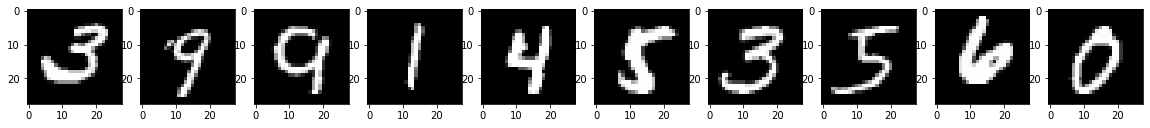

In [102]:
# on initialise les centroides aléatoirement et on associe les données correspondant 
clusters = {}
for i in range(k):
    clusters[i] = []
index=[]    
centroids= {}
for i in range(k):
    rand=rd.randint(0,m-1)
    index.append(rand)
    centroids[i] = X[rand]
    
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')
    
for data in X:
    euc_dist = [np.linalg.norm(data - centroids[j]) for j in range(k)]
    clusters[np.argmin(np.asarray(euc_dist))].append(data)
print(index)

In [103]:
def re_clusters(X, centroids, k):# fonction qui recalcule les clusters
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for data in X:
        euc_dist = [np.linalg.norm(data - centroids[j]) for j in range(k)]
        clusters[np.argmin(np.asarray(euc_dist))].append(data)
    return clusters

def re_centroids(clusters, k):# fonction qui recalcule les centroids
    centroids= {}
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis=0)
        
    return centroids

def coherence(centroids_j, clusters_j):
    temp=[np.linalg.norm(data - centroids_j)**2 for data in clusters_j ]
    return sum(temp)

def quality(centroids, clusters):
    temp=[coherence(centroids[i],clusters[i]) for i in range(k)]
    return sum(temp)


In [104]:
clusters_nv=re_clusters(X, centroids, k)
centroids_nv=re_centroids(clusters, k)
L=[]
start=time.time()
while abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))>tol :
    L.append(abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv)))
    centroids=centroids_nv
    clusters=clusters_nv
    clusters_nv=re_clusters(X, centroids, k)
    centroids_nv=re_centroids(clusters_nv, k)
end=time.time()

91
Temps de réalisation : 879.0403919219971 secondes


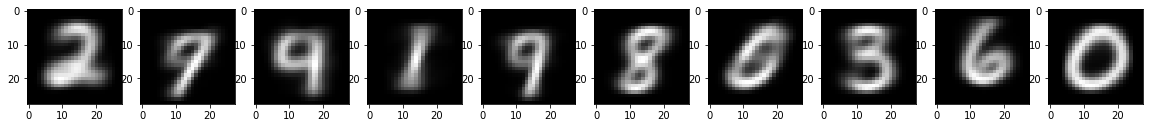

In [105]:
L.append(abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv)))
print(len(L))
print("Temps de réalisation : " + str(end-start) + " secondes")
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

In [106]:
print(L)
import os
os.system('afplay /System/Library/Sounds/Sosumi.aiff')

[107838383217.83902, 23784971440.737793, 3638234746.3452454, 1233603489.725586, 704384502.3435364, 428735150.32507324, 250452557.5723877, 132876794.54318237, 71341604.92971802, 40905894.69534302, 28364228.123657227, 20790822.846832275, 16996558.972229004, 14681342.499572754, 13056285.912109375, 14036319.327636719, 14164755.365264893, 15250547.92602539, 15551873.196380615, 15345231.134918213, 15247030.933166504, 16372274.763275146, 16541574.687896729, 18812744.171813965, 18936691.849578857, 18188737.997406006, 19881034.347595215, 18385170.247680664, 19003119.43145752, 19774015.2505188, 17460951.759368896, 14368495.936157227, 13888714.890228271, 12575253.60421753, 12623732.538269043, 12051924.307891846, 9588898.585998535, 9501896.467956543, 8834210.318817139, 6603866.337615967, 7155949.046630859, 7567925.0341796875, 7251357.859588623, 6448929.715057373, 5082684.050018311, 4469854.052978516, 4421434.71786499, 2964230.8387145996, 2343355.0287475586, 2373487.503479004, 2350601.3639526367, 2

0

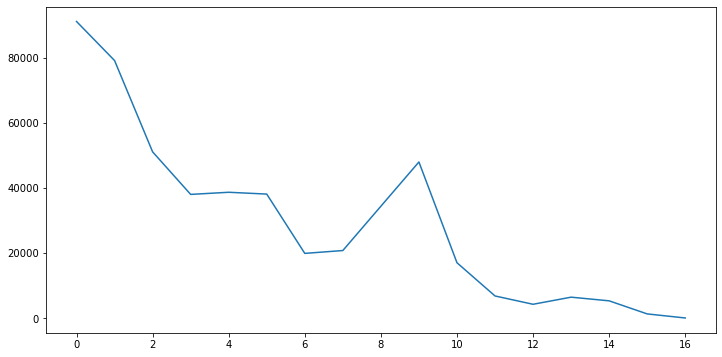

In [92]:
plt.figure(figsize=(12,6)) 
plt.plot([i for i in range(len(L)-70)],L[70:])
plt.show()

In [70]:
L[1]

18925578032.594055